## bigdata-project-pca

### 1. Exploratory Data Analysis

before apply PCA to the dataset, en exploration of dataset should be done
During this part, I'll explore the correaltion between features and 'fare'

### 2. PCA

After the basic analyse in first part, the most important features can be selected



In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./results-20200505-171352.csv")
df.drop(['unique_key','taxi_id'],axis=1,inplace = True)
df.tail()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
995,2015-04-04 10:00:00 UTC,2015-04-04 10:00:00 UTC,0,0.0,NaN,NaN,NaN,NaN,6.85,2.06,...,0.0,8.91,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN
996,2015-03-03 16:45:00 UTC,2015-03-03 16:45:00 UTC,0,0.0,NaN,NaN,NaN,NaN,5.85,1.17,...,0.0,7.02,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN
997,2015-04-11 09:45:00 UTC,2015-04-11 09:45:00 UTC,0,0.0,NaN,NaN,NaN,NaN,42.00,0.00,...,0.0,42.00,Credit Card,Suburban Dispatch LLC,NaN,NaN,NaN,NaN,NaN,NaN
998,2015-04-11 09:45:00 UTC,2015-04-11 09:45:00 UTC,0,0.0,NaN,NaN,NaN,NaN,3.25,0.00,...,0.0,3.25,Cash,Taxi Affiliation Services,NaN,NaN,NaN,NaN,NaN,NaN
999,2015-03-03 16:15:00 UTC,2015-03-03 16:15:00 UTC,0,0.0,NaN,NaN,NaN,NaN,5.05,1.01,...,0.0,6.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# check if have missing value
df.isna().sum()


trip_start_timestamp         0
trip_end_timestamp           0
trip_seconds                 0
trip_miles                   0
pickup_census_tract       1000
dropoff_census_tract      1000
pickup_community_area     1000
dropoff_community_area    1000
fare                         0
tips                         0
tolls                        0
extras                       0
trip_total                   0
payment_type                 0
company                      0
pickup_latitude           1000
pickup_longitude          1000
pickup_location           1000
dropoff_latitude          1000
dropoff_longitude         1000
dropoff_location          1000
dtype: int64

In [105]:
df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
count,1000.000000,1000.000000,0.0,0.0,0.0,0.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,82.560000,0.118300,NaN,NaN,NaN,NaN,16.488680,2.908310,0.0,0.362450,19.759440,NaN,NaN,NaN,NaN,NaN,NaN
std,370.792305,1.140314,NaN,NaN,NaN,NaN,14.189478,2.984956,0.0,5.590764,17.073454,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,NaN,NaN,NaN,NaN,6.650000,1.167500,0.0,0.000000,8.090000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,0.000000,NaN,NaN,NaN,NaN,9.850000,2.000000,0.0,0.000000,11.820000,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,0.000000,NaN,NaN,NaN,NaN,23.950000,3.937500,0.0,0.000000,29.107500,NaN,NaN,NaN,NaN,NaN,NaN
max,4860.000000,18.300000,NaN,NaN,NaN,NaN,92.550000,40.000000,0.0,159.950000,164.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# we can drop those collums that are totally blank
blank_list = ['pickup_census_tract','dropoff_census_tract',
              'pickup_community_area','dropoff_community_area',
              'pickup_latitude','pickup_longitude',
              'pickup_location','dropoff_latitude',
              'dropoff_longitude','dropoff_location']

df.drop(blank_list,axis=1,inplace = True)
df.describe()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,82.560000,0.118300,16.488680,2.908310,0.0,0.362450,19.759440
std,370.792305,1.140314,14.189478,2.984956,0.0,5.590764,17.073454
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,6.650000,1.167500,0.0,0.000000,8.090000
50%,0.000000,0.000000,9.850000,2.000000,0.0,0.000000,11.820000
75%,0.000000,0.000000,23.950000,3.937500,0.0,0.000000,29.107500
max,4860.000000,18.300000,92.550000,40.000000,0.0,159.950000,164.000000


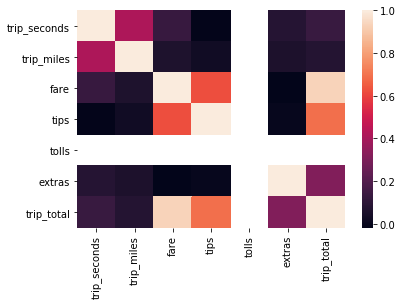

In [107]:
sns.heatmap(df.corr());

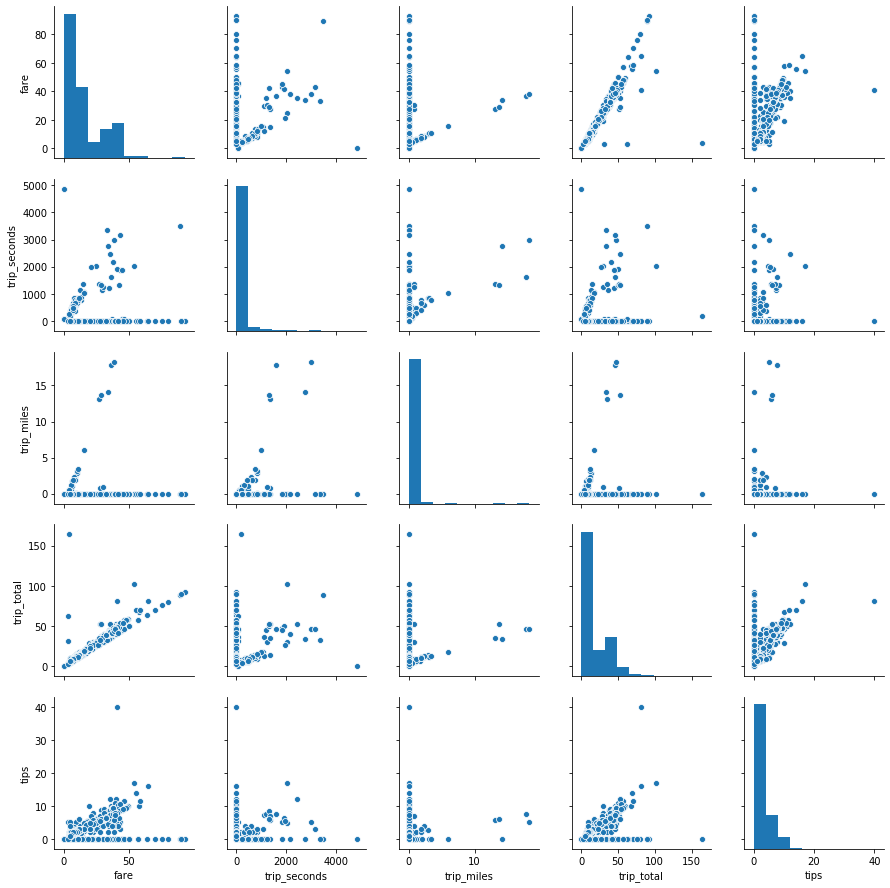

In [80]:
sns.pairplot(data=df[['fare','trip_seconds','trip_miles','trip_total','tips']].dropna())
plt.show()

 so we can know that 'trip_seconds','trip_miles','trip_total' have strong corelationship to fare

### 2. PCA

then we use PCA to do further analyse 

before that , a data pre processing shouled be applied to encode features

In [108]:
df = pd.get_dummies(df, columns=['payment_type', 'company'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,payment_type_Credit Card,...,company_Chicago Elite Cab Corp. (Chicago Carriag,company_Chicago Medallion Management,company_Choice Taxi Association,company_Dispatch Taxi Affiliation,company_Northwest Management LLC,company_Suburban Dispatch LLC,company_T.A.S. - Payment Only,company_Taxi Affiliation Services,company_Top Cab Affiliation,company_nan
995,2015-04-04 10:00:00 UTC,2015-04-04 10:00:00 UTC,0,0.0,6.85,2.06,0.0,0.0,8.91,1,...,1,0,0,0,0,0,0,0,0,0
996,2015-03-03 16:45:00 UTC,2015-03-03 16:45:00 UTC,0,0.0,5.85,1.17,0.0,0.0,7.02,1,...,1,0,0,0,0,0,0,0,0,0
997,2015-04-11 09:45:00 UTC,2015-04-11 09:45:00 UTC,0,0.0,42.00,0.00,0.0,0.0,42.00,1,...,0,0,0,0,0,1,0,0,0,0
998,2015-04-11 09:45:00 UTC,2015-04-11 09:45:00 UTC,0,0.0,3.25,0.00,0.0,0.0,3.25,0,...,0,0,0,0,0,0,0,1,0,0
999,2015-03-03 16:15:00 UTC,2015-03-03 16:15:00 UTC,0,0.0,5.05,1.01,0.0,0.0,6.06,1,...,1,0,0,0,0,0,0,0,0,0


In [85]:
! pip install plotly

  Stored in directory: C:\Users\curly\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [86]:
# before PCA,
import plotly
import plotly.graph_objs as go

fig1 = go.Scatter3d(x=df['tips'],
                    y=df['trip_total'],
                    z=df['fare'],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

mylayout = go.Layout(scene=dict(xaxis=dict( title="tips"),
                                yaxis=dict( title="trip_total"),
                                zaxis=dict(title="fare")),)

plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot.html"))

'3DPlot.html'

In [109]:
from sklearn.decomposition import PCA

# for the initial number of componets, pick 3 
#because previous graph shows 3 features are strongly related to fare.
# due to time stamps are string value and no corelation to fare, it chould be dropped
df.drop(['trip_start_timestamp','trip_end_timestamp'],axis=1,inplace = True)
pca = PCA(n_components=3)
newX = pca.fit_transform(df)
df.tail()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,payment_type_Credit Card,payment_type_No Charge,payment_type_Unknown,...,company_Chicago Elite Cab Corp. (Chicago Carriag,company_Chicago Medallion Management,company_Choice Taxi Association,company_Dispatch Taxi Affiliation,company_Northwest Management LLC,company_Suburban Dispatch LLC,company_T.A.S. - Payment Only,company_Taxi Affiliation Services,company_Top Cab Affiliation,company_nan
995,0,0.0,6.85,2.06,0.0,0.0,8.91,1,0,0,...,1,0,0,0,0,0,0,0,0,0
996,0,0.0,5.85,1.17,0.0,0.0,7.02,1,0,0,...,1,0,0,0,0,0,0,0,0,0
997,0,0.0,42.00,0.00,0.0,0.0,42.00,1,0,0,...,0,0,0,0,0,1,0,0,0,0
998,0,0.0,3.25,0.00,0.0,0.0,3.25,0,0,0,...,0,0,0,0,0,0,0,1,0,0
999,0,0.0,5.05,1.01,0.0,0.0,6.06,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [111]:
print(pca.explained_variance_ratio_)

[9.96190430e-01 3.43316536e-03 3.19537365e-04]


In [112]:
print(pca.explained_variance_)

[1.37495963e+05 4.73851549e+02 4.41031117e+01]


In [113]:
print()

[[-82.681609   -15.08814829   0.46770739]
 [-82.64966366 -11.23597334  -0.41400219]
 [-82.68724659 -15.78063436   0.60183316]
 ...
 [-82.29402504  33.5372324   -4.68286788]
 [-82.72439625 -20.68341486   0.49927853]
 [-82.69886571 -17.28911268   0.56538985]]


In [118]:
X= [newX[0].data for i in range(len(newX))]
Y= [newX[1].data for i in range(len(newX))]

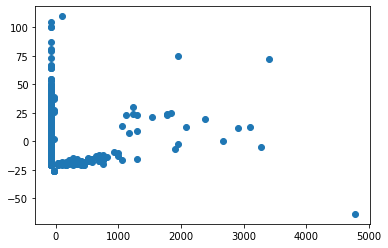

In [122]:
import matplotlib.pyplot as plt
plt.scatter(newX[:,0],newX[:,1])
plt.show()

This result means it is enough to cover 99.9% if we take two features that is most important.